<a href="https://colab.research.google.com/github/nhunbtran155/exercise-25-3-2025/blob/main/excercise_30_4_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ID CARD TO EXCEL FILE

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 581 kB/3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.3
Err:1 http://security.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.3
  404  Not Found [IP: 185.125.190.81 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/liba/libarch

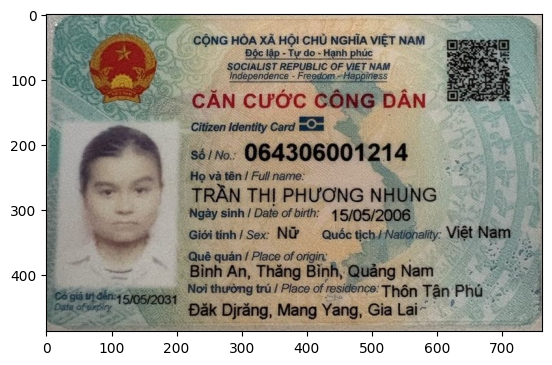

   
   
    
 
 
  

‘CONG HOA XA HOI CHU NGHIA VIET NAM
jap - Ty do - Hanh phuc
goeaeer eee OF FEE ae

Sanna:

TRAN TH! PHUONG

Ngay sinh/ Date of birth: 4
Giditinh/ Sex: NO — Quéc

Qué quan / Place of origin:
Binh An, Thang Binh,

  
  
 
  

Dak Djrang, Mang Yang, Gia Lai~  '



In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt


pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

filename = '/content/drive/MyDrive/idcard.jpg'
img = plt.imread(filename)
plt.imshow(img)
plt.show()
img1 = np.array(Image.open(filename))
text = pytesseract.image_to_string(img1)
print(text)

In [ ]:
from pytesseract import Output
import pytesseract
import cv2
results = pytesseract.image_to_data(img1, output_type=Output.DICT)
print(results)

{'level': [1, 2, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 2, 3, 4, 5, 4, 5, 4, 5, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

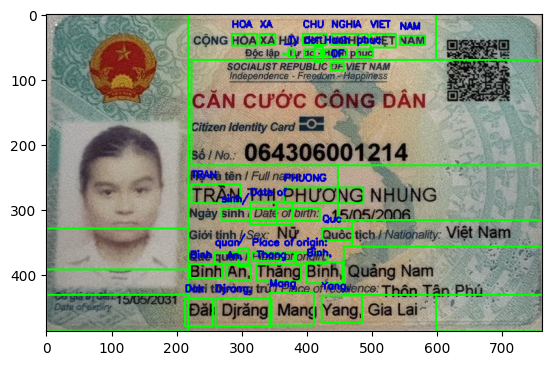

In [ ]:
for i in range (0, len(results['text'])):
  x = results['left'][i]
  y = results['top'][i]
  w = results['width'][i]
  h = results['height'][i]
  text = results['text'][i]
  conf = int(results['conf'][i])
  if conf > 70:
    text = ''.join([c if ord(c) < 128 else '' for c in text]). strip()
    cv2.rectangle(img1, (x,y), (x+w, y+h), (0,255,0),2)
    cv2.putText(img1, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,200),2)
plt.imshow(img1)
plt.show()

In [ ]:
import re #chuẩn hóa dữ liệu văn bản dựa vào mẫu cố định

name_match = re.search(r'name:\s*(.*)', text)
dob_match = re.search(r'Date of Birth:\s*(.*)', text)
Place_of_origin_match = re.search(r'Place of origin:\s*(.*)', text)

name = name_match.group(1) if name_match else "Not Found"
dob = dob_match.group(1) if dob_match else "Not Found"
Place_of_origin= Place_of_origin_match.group(1) if Place_of_origin_match else "Not Found"

In [ ]:
import pandas as pd
data = {'name': [name], 'Date of Birth': [dob], 'Place of origin': [Place_of_origin]}
df = pd.DataFrame(data)

In [ ]:
#Lưu file excel
output_file = '/content/drive/MyDrive/ID_Infomation.xlsx'
df.to_excel(output_file, index=False)

print(f"Data saved to {output_file}")

Data saved to /content/drive/MyDrive/ID_Infomation.xlsx


detect the faces and recognize the names


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 


image 1/1 /content/drive/MyDrive/thanhvien.jpg: 640x512 4 persons, 326.6ms
Speed: 10.6ms preprocess, 326.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


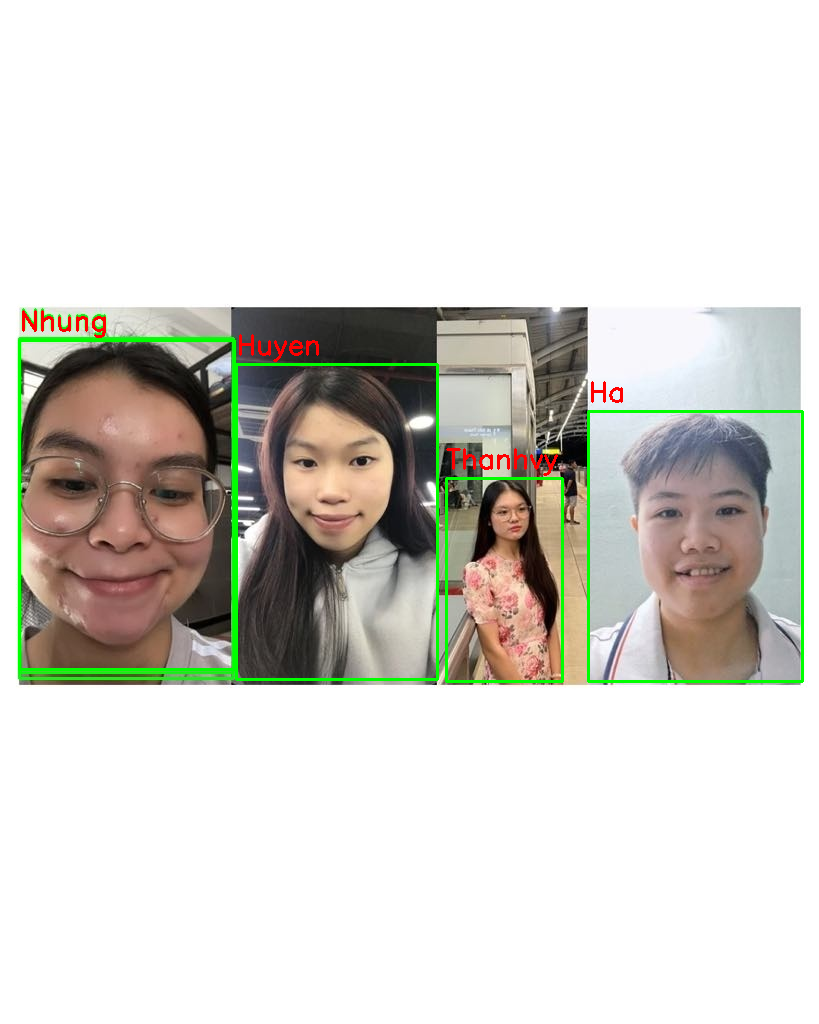

In [ ]:
import cv2
from ultralytics import YOLO
model = YOLO("yolov8n-pose.pt")

image_path = "/content/drive/MyDrive/thanhvien.jpg"
image = cv2.imread(image_path)

names = ["Nhung", "Huyen", "Ha", "Thanhvy"]


results = model(image_path)
detections = results[0].boxes.data.tolist()
for i, detection in enumerate(detections):
    x1, y1, x2, y2 = map(int, detection[:4])
    if i < len(names):
        name = names[i]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
cv2.imwrite('/content/drive/MyDrive/thanhvien_with_names.jpg', image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Chatbox for sales

In [ ]:
pip install transformers

In [ ]:
from transformers import pipeline, set_seed

generator = pipeline('text-generation', model='gpt2')
set_seed(42)

def sales_chatbot():
    iphone = {
        "iphone13": "$550",
        "iphone14": "$650",
        "iphone15": "$750",
        "iphone16": "$899"
    }
    initial_message = "SalesBot: Welcome to Nhung's store! We have the following computers available:\n"
    for name, price in iphone.items():
        initial_message += f"- {name}: {price}\n"
    initial_message += "How can I help you today?\n"

    print(initial_message.strip())
    print("(Type 'exit' to end the conversation)\n")
    conversation_history = initial_message

    while True:
        user_input = input("You: ")

        if user_input.lower() in ['exit', 'quit']:
            print("\nSalesBot: Thank you for chatting with us! Have a great day!")
            break
        prompt = f"{conversation_history}You: {user_input}\nSalesBot:"
        responses = generator(
            prompt,
            max_length=200,
            num_return_sequences=1,
            temperature=0.7,
            pad_token_id=50256
        )
        bot_response = responses[0]['generated_text'].replace(prompt, "").split("\n")[0]
        conversation_history += f"You: {user_input}\nSalesBot: {bot_response}\n"

        print(f"\nSalesBot: {bot_response}\n")

if __name__ == "__main__":
    sales_chatbot()

Device set to use cpu


SalesBot: Welcome to Nhung's store! We have the following computers available:
- iphone13: $550
- iphone14: $650
- iphone15: $750
- iphone16: $899
How can I help you today?
(Type 'exit' to end the conversation)

You: What's the price of iphone16


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.



SalesBot:  iphone4: $25

You: How much is iphone 14 ?

SalesBot:   iphone5: $50

You: exit

SalesBot: Thank you for chatting with us! Have a great day!


thùng

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 5

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train-20250505T104945Z-001',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary')

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/test-20250505T104935Z-001',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary')

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator)

model.save('kiem_tra_thung.h5')

Found 410 images belonging to 1 classes.
Found 24 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9140 - loss: 0.2561 - val_accuracy: 0.0000e+00 - val_loss: 3.8904
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 523ms/step - accuracy: 1.0000 - loss: 1.7770e-05 - val_accuracy: 0.0000e+00 - val_loss: 9.6360
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 570ms/step - accuracy: 1.0000 - loss: 1.5730e-04 - val_accuracy: 0.0000e+00 - val_loss: 13.1202
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 524ms/step - accuracy: 1.0000 - loss: 8.2276e-06 - val_accuracy: 0.0000e+00 - val_loss: 15.3951
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 523ms/step - accuracy: 0.9991 - loss: 0.0023 - val_accuracy: 0.0000e+00 - val_loss: 4.9546


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Thùng hàng ĐẠT yêu cầu.


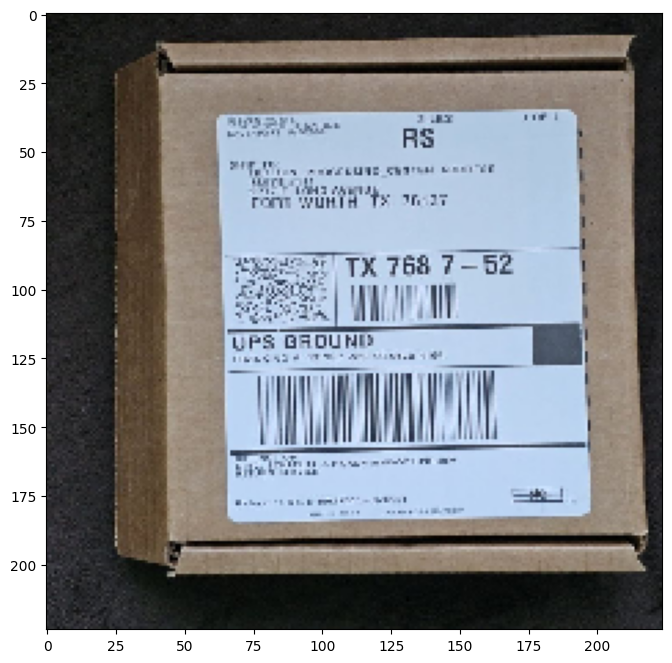

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('kiem_tra_thung.h5')

img_path = '/content/drive/MyDrive/test_thung-20250505T104343Z-001/test_thung/2.jpg'
img = image.load_img(img_path, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)

if pred[0][0] > 0.5:
    print("Thùng hàng ĐẠT yêu cầu.")
else:
    print("Thùng hàng KHÔNG ĐẠT yêu cầu.")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
Thùng hàng ĐẠT yêu cầu.


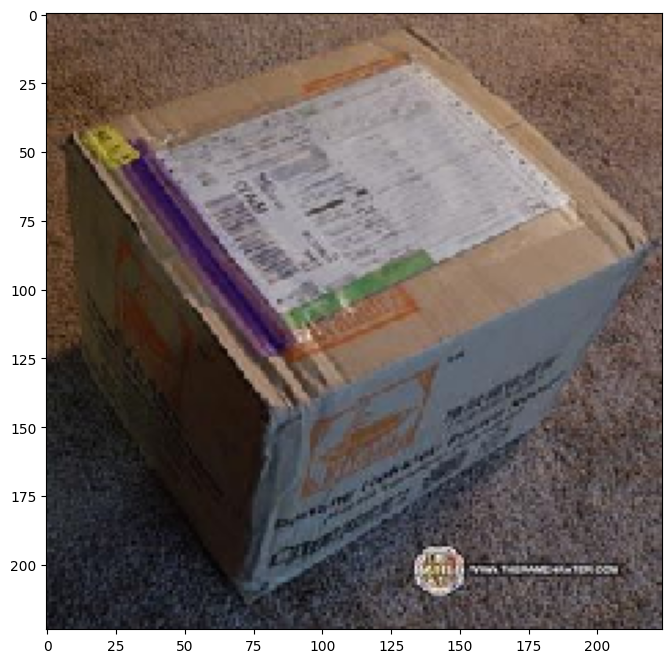

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('kiem_tra_thung.h5')

img_path = '/content/drive/MyDrive/test_thung-20250505T104343Z-001/test_thung/4.jpg'
img = image.load_img(img_path, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)

if pred[0][0] > 0.5:
    print("Thùng hàng ĐẠT yêu cầu.")
else:
    print("Thùng hàng KHÔNG ĐẠT yêu cầu.")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.show()

chai nước

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
results = model.train(
    data='/content/drive/MyDrive/Bottle.v1i.yolov8/data.yaml',
    epochs=5)

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Bottle.v1i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

train: Scanning /content/drive/MyDrive/Bottle.v1i.yolov8/train/labels.cache... 310 images, 2 backgrounds, 0 corrupt: 100%|██████████| 310/310 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±1.1 ms, read: 17.1±5.1 MB/s, size: 45.0 KB)


val: Scanning /content/drive/MyDrive/Bottle.v1i.yolov8/valid/labels.cache... 89 images, 1 backgrounds, 0 corrupt: 100%|██████████| 89/89 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train10
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.474      3.465      1.469        117        640: 100%|██████████| 20/20 [04:58<00:00, 14.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:35<00:00, 11.70s/it]

                   all         89       1151      0.997      0.149      0.163      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.238      2.054      1.277         61        640: 100%|██████████| 20/20 [04:47<00:00, 14.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:31<00:00, 10.35s/it]

                   all         89       1151      0.997      0.164       0.36       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.183      1.297      1.273         83        640: 100%|██████████| 20/20 [04:55<00:00, 14.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:29<00:00,  9.92s/it]

                   all         89       1151      0.898      0.401      0.749      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.131      1.076      1.233        119        640: 100%|██████████| 20/20 [04:40<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:29<00:00,  9.87s/it]

                   all         89       1151      0.851       0.56      0.786      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.103      1.009      1.233        116        640: 100%|██████████| 20/20 [04:49<00:00, 14.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:30<00:00, 10.25s/it]

                   all         89       1151      0.832      0.853       0.86      0.599



5 epochs completed in 0.447 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.32s/it]


                   all         89       1151      0.832      0.853       0.86      0.599
                   Cap         73        215      0.977      0.963      0.993      0.693
       Defective-Label         85        119      0.636      0.992      0.773      0.586
            Good-Label         82        116      0.497      0.974      0.777      0.574
                No-Cap         84        165      0.963      0.994      0.973       0.63
              No-label         80        149      0.956      0.201       0.66      0.299
                bottle         88        387      0.959      0.995      0.983      0.813
Speed: 7.4ms preprocess, 269.0ms inference, 0.0ms loss, 11.7ms postprocess per image
Results saved to runs/detect/train10


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



image 1/1 /content/images (2).jpg: 640x384 1 bottle, 229.7ms
Speed: 3.2ms preprocess, 229.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /content/images (2).jpg: 640x384 1 bottle, 213.3ms
Speed: 3.4ms preprocess, 213.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


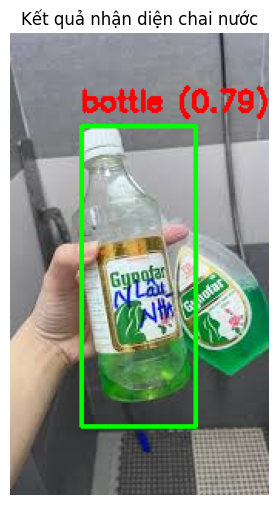


 Kết quả tổng: FAILED
 Chi tiết kiểm tra:
-  Không xác định được mực nước
Lỗi phát hiện:
-  Không xác định được mực nước


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

class BottleQualityChecker:
    def __init__(self):
        self.component_detector = YOLO("runs/detect/train3/weights/best.pt")
        self.MIN_FILL_LEVEL = 0.95

    def analyze_bottle(self, image_path):
        components = self.detect_components(image_path)

        results = {
            'fill_level': self.check_fill_level(components),
            'cap_condition': self.skip_check(),
            'label_condition': self.skip_check(),
        }

        self.display_results(image_path)
        return self.compile_results(results)

    def detect_components(self, image_path):
        detection = self.component_detector(image_path)[0]
        return {
            'bottle_body': self.get_component(detection, 'bottle_body'),
            'water_level': self.get_component(detection, 'water_level'),
            'bottle_cap': self.get_component(detection, 'bottle_cap'),
            'bottle_label': self.get_component(detection, 'bottle_label'),
            'original_image': cv2.imread(image_path)
        }

    def get_component(self, detection, class_name):
        for box in detection.boxes:
            if detection.names[int(box.cls)] == class_name:
                return box.xyxy[0].cpu().numpy()
        return None

    def check_fill_level(self, components):
        if components['water_level'] is None or components['bottle_body'] is None:
            return {'status': False, 'message': ' Không xác định được mực nước'}

        bottle_h = components['bottle_body'][3] - components['bottle_body'][1]
        water_h = components['water_level'][3] - components['water_level'][1]
        fill_ratio = water_h / bottle_h

        return {
            'status': fill_ratio >= self.MIN_FILL_LEVEL,
            'value': fill_ratio,
            'message': f'Mực nước: {fill_ratio:.1%}'
        }

    def skip_check(self):
        return {'status': True, 'message': None}
    def compile_results(self, results):
        passed = all([v['status'] for v in results.values()])
        return {
            'final_status': 'PASSED' if passed else 'FAILED',
            'details': [v['message'] for v in results.values() if v['message']],
            'errors': [v['message'] for v in results.values() if not v['status'] and v['message']]
        }

    def display_results(self, image_path):
        image = cv2.imread(image_path)
        results = self.component_detector(image_path)[0]

        for box in results.boxes:
            cls_id = int(box.cls)
            label = results.names[cls_id]
            conf = float(box.conf)
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{label} ({conf:.2f})", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 6))
        plt.imshow(image_rgb)
        plt.axis("off")
        plt.title("Kết quả nhận diện chai nước")
        plt.show()

#  Sử dụng
checker = BottleQualityChecker()
result = checker.analyze_bottle('/content/images (2).jpg')

print(f"\n Kết quả tổng: {result['final_status']}")
print(" Chi tiết kiểm tra:")
for detail in result['details']:
    print(f"- {detail}")
if result['errors']:
    print("Lỗi phát hiện:")
    for error in result['errors']:
        print(f"- {error}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Đồ ăn

In [ ]:
# Cài đặt và clone YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5



image 1/1 /content/drive/MyDrive/canteen_project-20250505T123529Z-001/canteen_project/train/val/images/1594802172354.jpg: 480x640 3 bowls, 2 broccolis, 1 dining table, 194.6ms
Speed: 4.0ms preprocess, 194.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


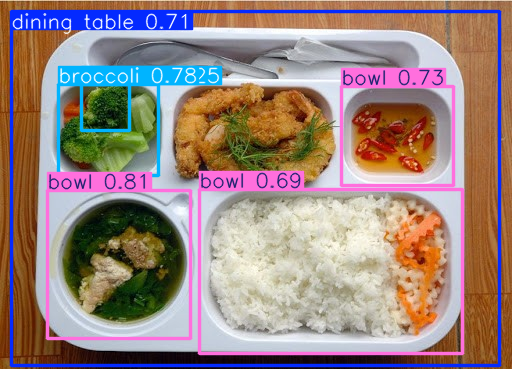

 Đã cắt 6 món ăn và lưu tại: /content/detected_items


In [ ]:
!pip install -q ultralytics

from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# LOAD MÔ HÌNH
model = YOLO("yolov8n.pt")  # hoặc thay bằng model đã huấn luyện của bạn

# DỰ ĐOÁN
results = model("/content/drive/MyDrive/canteen_project-20250505T123529Z-001/canteen_project/train/val/images/1594802172354.jpg")  # ảnh khay cơm

#  HIỂN THỊ BOX
for r in results:
    r.show()

#  CẮT ẢNH VÀ LƯU
output_dir = "/content/detected_items"
os.makedirs(output_dir, exist_ok=True)

img = cv2.imread("/content/drive/MyDrive/canteen_project-20250505T123529Z-001/canteen_project/train/val/images/1594802172354.jpg")

for i, box in enumerate(results[0].boxes.xyxy.cpu().numpy()):
    x1, y1, x2, y2 = map(int, box)
    crop = img[y1:y2, x1:x2]
    save_path = os.path.join(output_dir, f"item_{i+1}.jpg")
    cv2.imwrite(save_path, crop)

print(f" Đã cắt {len(results[0].boxes)} món ăn và lưu tại: {output_dir}")

In [ ]:
import torch
import torch.nn as nn

#  1. Mô hình Dummy CNN rất đơn giản
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=6):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3 * 224 * 224, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.model(x)

#  2. Khởi tạo và lưu ====
model = SimpleCNN(num_classes=6)
torch.save(model.state_dict(), "cnn_model.pth")
print("Đã tạo xong model dummy: cnn_model.pth")

Đã tạo xong model dummy: cnn_model.pth



image 1/1 /content/drive/MyDrive/canteen_project-20250505T123529Z-001/canteen_project/train/val/images/1594802172354.jpg: 480x640 3 bowls, 2 broccolis, 1 dining table, 185.0ms
Speed: 4.2ms preprocess, 185.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


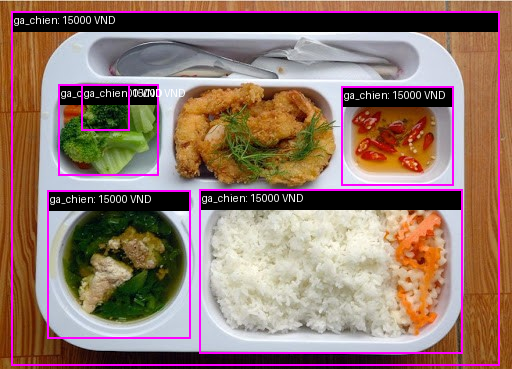


 HÓA ĐƠN PHẦN CƠM 
- ga_chien: 15000 VND
- ga_chien: 15000 VND
- ga_chien: 15000 VND
- ga_chien: 15000 VND
- ga_chien: 15000 VND
- ga_chien: 15000 VND
>> TỔNG CỘNG: 90000 VND


In [ ]:
#CÀI ĐẶT THƯ VIỆN
!pip install -q ultralytics
import torch
from ultralytics import YOLO
import cv2
import os
import json
from PIL import Image, ImageDraw, ImageFont
import torchvision.transforms as transforms
import torch.nn as nn
from IPython.display import display

#  LOAD MÔ HÌNH
yolo_model = YOLO("yolov8n.pt")

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3 * 224 * 224, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        return self.model(x)

with open("/content/drive/MyDrive/canteen_project-20250505T123529Z-001/canteen_project/class_names.txt", "r", encoding="utf-8") as f:
    class_names = [line.strip() for line in f.readlines()]

with open("/content/drive/MyDrive/canteen_project-20250505T123529Z-001/canteen_project/menu.json", "r", encoding="utf-8") as f:
    menu = json.load(f)

cnn_model = SimpleCNN(num_classes=len(class_names))
cnn_model.load_state_dict(torch.load("cnn_model.pth", map_location="cpu"))
cnn_model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


image_path = "/content/drive/MyDrive/canteen_project-20250505T123529Z-001/canteen_project/train/val/images/1594802172354.jpg"
output_dir = "/content/detected_items"
os.makedirs(output_dir, exist_ok=True)

results = yolo_model(image_path)
img_cv = cv2.imread(image_path)
img_pil = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(img_pil)

font = ImageFont.load_default()
total_price = 0
receipt = []

for i, box in enumerate(results[0].boxes.xyxy.cpu().numpy()):
    x1, y1, x2, y2 = map(int, box)
    crop = img_cv[y1:y2, x1:x2]
    crop_path = os.path.join(output_dir, f"item_{i+1}.jpg")
    cv2.imwrite(crop_path, crop)

    # Load ảnh cắt và dự đoán bằng CNN
    image_crop = Image.open(crop_path).convert("RGB")
    input_tensor = transform(image_crop).unsqueeze(0)

    with torch.no_grad():
        output = cnn_model(input_tensor)
        pred_idx = output.argmax(dim=1).item()
        pred_class = class_names[pred_idx]

    price = menu.get(pred_class, {}).get("price", 0)
    total_price += price
    receipt.append((pred_class, price))

    # Vẽ nhãn tên món và giá ngay trên ảnh gốc
    label = f"{pred_class}: {price} VND"
    draw.rectangle([x1, y1, x2, y1 + 20], fill="black")
    draw.text((x1 + 3, y1 + 3), label, fill="white", font=font)
    draw.rectangle([x1, y1, x2, y2], outline="magenta", width=2)

# HIỂN THỊ ẢNH GỐC ĐÃ GẮN NHÃN
display(img_pil)

# IN HÓA ĐƠN
print("\n HÓA ĐƠN PHẦN CƠM ")
for name, price in receipt:
    print(f"- {name}: {price} VND")
print(f">> TỔNG CỘNG: {total_price} VND")

# ưLƯU HÓA ĐƠN
with open("receipt.txt", "w", encoding="utf-8") as f:
    f.write(" HÓA ĐƠN PHẦN CƠM \n")
    for name, price in receipt:
        f.write(f"- {name}: {price} VND\n")
    f.write(f">> TỔNG CỘNG: {total_price} VND\n")